In [1]:
%load_ext rich
%load_ext ensurewd

In [2]:
from pathlib import Path

import numpy as np
import polars as pl

from utils.plots import plot_elbow, plot_silhouette

In [3]:
FEATURES_MATIX_CSV = Path(
    '../data/raw/histopathologic-cancer-detection/feature_matrix_train.csv'
)

rows = 220025
columns = 4096

In [4]:
# load slice of dataframe for test
features_matrix_lazy_df = pl.scan_csv(FEATURES_MATIX_CSV)
features_matrix_df = features_matrix_lazy_df.slice(0, 400).collect()

In [5]:
features_matrix_df.head(n=5)

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,…,4059,4060,4061,4062,4063,4064,4065,4066,4067,4068,4069,4070,4071,4072,4073,4074,4075,4076,4077,4078,4079,4080,4081,4082,4083,4084,4085,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0.089307,0.057466,-1.511272,-2.361004,0.2040523,0.331598,-0.707679,-3.085646,-0.127085,-0.420296,0.7578907,-0.401945,0.9736769,1.2623959,-1.520222,-1.805371,-1.471688,-0.286437,-0.118409,0.730151,0.9340863,-0.412086,0.371592,1.0997484,0.031448,0.773711,-0.758258,0.71552,-1.102456,0.9082699,0.8209421,0.6311903,-0.338147,0.581672,0.4834201,0.104154,-0.734027,…,0.481672,-0.421057,-0.588153,0.153505,0.578684,-1.457735,0.493514,-0.972109,-0.17466,0.301993,-0.31139,-0.478737,0.535277,-0.277677,-0.730393,0.881534,-0.951705,0.789214,0.943487,-2.534696,0.1572583,0.297772,-0.262711,-0.015571,0.5328669,1.0868814,-0.876784,0.836864,0.528627,-2.982123,0.9232437,1.1921706,-0.130424,-0.958985,-0.336657,-0.063674,-1.155075
0.172228,0.21716,0.132434,-1.287986,-0.033716,-0.063795,-0.228082,-1.452136,-0.418666,-0.266207,0.3729228,-0.119188,0.4791236,0.7849041,-0.871925,-0.52177,-0.527925,-0.279645,0.089598,0.112323,0.5305397,-0.012204,0.084965,0.189588,0.601466,0.4455038,-0.268777,-0.021868,-0.461904,0.268022,0.3877098,0.353577,0.5072973,0.149308,-0.170757,0.3083891,-0.417909,…,0.07025,-0.17332,0.027818,-0.329155,0.378113,-0.039567,-0.077494,-0.463961,0.435242,0.184989,-0.068535,-0.379053,0.368619,-0.354643,-0.008173,0.280272,-0.556792,0.2335642,0.564798,-0.852694,0.046035,-0.406427,-0.145705,-0.050961,0.284689,0.5723529,0.15956,0.547654,0.338933,-0.635863,0.323177,-0.362378,-0.201997,-1.416427,-0.641334,-0.00942,-0.435063
0.1433996,-0.004247,-1.327553,-2.336601,0.015691,0.5136086,-0.90748,-3.22735,-0.020793,-0.242904,0.8055805,-0.332594,1.2723695,1.248954,-1.616051,-1.845906,-1.203724,-0.15888,0.157585,0.5135142,0.887536,-0.106154,0.5094106,1.0655276,0.223304,0.361031,-0.838241,0.84691,-0.68524,0.520199,0.7672473,0.387203,-0.042291,0.6449366,0.527144,0.06832,-1.173888,…,0.5668882,-0.410974,-0.218196,0.483078,0.6447028,-1.159589,0.365641,-1.324669,0.058065,0.7036693,-0.467874,-0.438932,0.526086,-0.164962,-0.547168,0.9257587,-1.102994,0.6899512,0.722649,-2.056081,0.1311486,0.298307,-0.153965,-0.328132,0.5990701,0.5862937,-0.725164,0.8955529,0.4635279,-2.602863,0.671149,0.899283,-0.088987,-1.304461,-0.358188,-0.290991,-0.647253
0.191139,0.2762548,0.163778,-1.63369,-0.099014,-0.103651,-0.591284,-1.634502,-0.391106,-0.336323,0.396357,-0.190319,0.3261463,0.700602,-1.093636,-0.657559,-0.614712,-0.244556,-0.010301,0.034918,0.8328073,-0.01871,-0.086185,0.186477,0.7645093,0.280915,-0.353202,-0.082137,-0.445985,0.4910705,0.457917,0.486519,0.4607819,0.2528524,-0.029583,0.005292,-0.30137,…,0.218452,0.002726,0.006716,-0.393153,0.325896,-0.14812,-0.136814,-0.467986,0.147265,0.121203,-0.245431,-0.13063,0.456694,-0.474171,0.06197,0.47099,-0.505825,-0.268045,0.8968526,-1.264923,0.219195,-0.370875,-0.281136,-0.057406,0.09366,0.6251211,0.007671,0.587317,0.457292,-0.651634,0.360775,-0.057776,-0.55169,-1.348385,-0.755551,0.01992,-0.451686
0.251828,0.6362322,-1.105089,-2.083029,-0.004438,0.175378,-1.0312,-2.711045,0.256079,-0.308171,0.7469367,0.287556,0.9120064,0.9423639,-1.927822,-1.406148,-1.238419,0.014985,-0.349354,0.8353295,0.7267074,-0.28188,0.428183,0.9601519,0.2754397,0.617008,-1.014799,0.6659409,-0.813566,0.6942856,0.509906,0.7195338,-0.454089,0.7112144,0.6048078,-0.210662,-0.718029,…,0.2738803,-0.890632,-0.204795,-0.033703,0.6634123,-1.163692,0.2812689,-0.776932,0.004311,0.310832,-0.331582,0.204367,0.519658,-0.700781,-0.982879,0.7383754,-1.222974,0.678886,0.8427258,-2.149078,0.39407

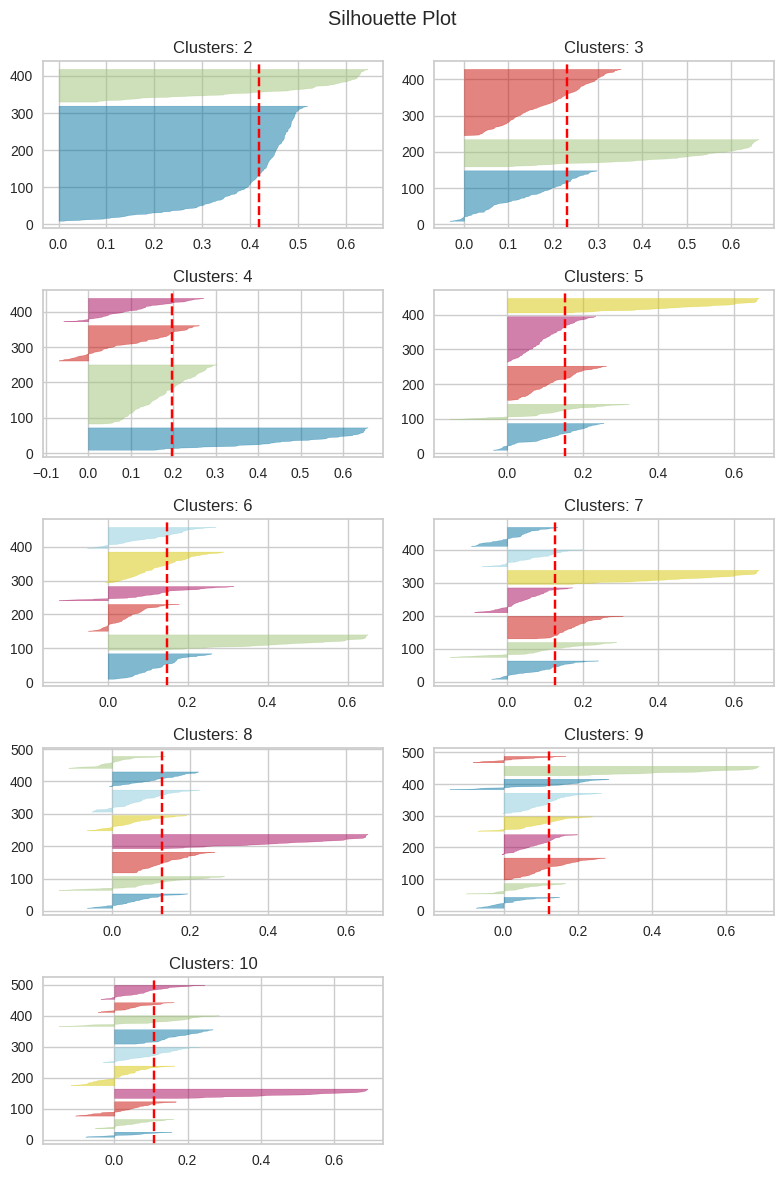

In [6]:
plot_silhouette(
    clusters=[2, 3, 4, 5, 6, 7, 8, 9, 10], feature_matrix=features_matrix_df
)

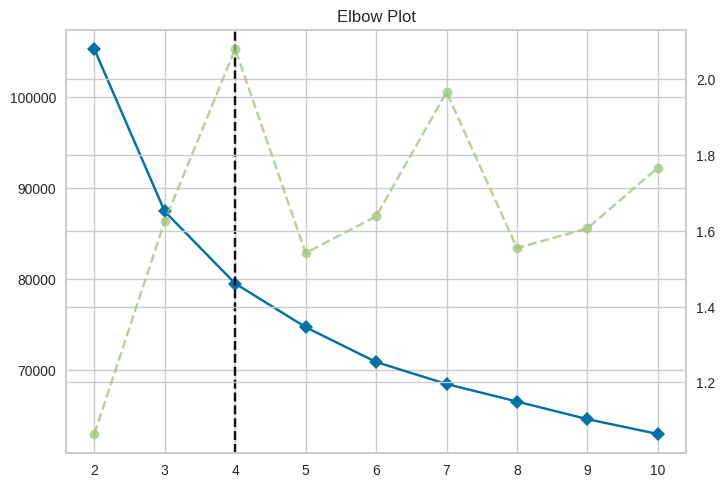

In [7]:
plot_elbow(
    clusters=[2, 3, 4, 5, 6, 7, 8, 9, 10],
    feature_matrix=features_matrix_df.to_pandas(),
)

### 